In [14]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # Для тестовых и тренировачных данных
from sklearn import preprocessing  # Кодировщик

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving income_evaluation.csv to income_evaluation.csv


In [15]:
df = pd.read_csv("income_evaluation.csv")
df.head

<bound method NDFrame.head of        age          workclass   fnlwgt    education   education-num  \
0       39          State-gov    77516    Bachelors              13   
1       50   Self-emp-not-inc    83311    Bachelors              13   
2       38            Private   215646      HS-grad               9   
3       53            Private   234721         11th               7   
4       28            Private   338409    Bachelors              13   
...    ...                ...      ...          ...             ...   
32556   27            Private   257302   Assoc-acdm              12   
32557   40            Private   154374      HS-grad               9   
32558   58            Private   151910      HS-grad               9   
32559   22            Private   201490      HS-grad               9   
32560   52       Self-emp-inc   287927      HS-grad               9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-cleri

In [16]:
print(df.shape)

(32561, 15)


In [17]:
print(df.dtypes)

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object


In [18]:
print(df.isna().sum()) # ехуу, пустых значений нет!

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64


In [19]:
from sklearn import preprocessing
model = preprocessing.LabelEncoder()
model.fit(df[' workclass'])
df[' workclass'] = model.transform(df[' workclass'])

model.fit(df[' education'])
df[' education'] = model.transform(df[' education'])

model.fit(df[' marital-status'])
df[' marital-status'] = model.transform(df[' marital-status'])

model.fit(df[' occupation'])
df[' occupation'] = model.transform(df[' occupation'])

model.fit(df[' relationship'])
df[' relationship'] = model.transform(df[' relationship'])

model.fit(df[' race'])
df[' race'] = model.transform(df[' race'])

model.fit(df[' sex'])
df[' sex'] = model.transform(df[' sex'])

model.fit(df[' native-country'])
df[' native-country'] = model.transform(df[' native-country'])

model.fit(df[' income'])
df[' income'] = model.transform(df[' income'])

In [20]:
print(df) # 0 это <=50к, а 1 это >50к

       age   workclass   fnlwgt   education   education-num   marital-status  \
0       39           7    77516           9              13                4   
1       50           6    83311           9              13                2   
2       38           4   215646          11               9                0   
3       53           4   234721           1               7                2   
4       28           4   338409           9              13                2   
...    ...         ...      ...         ...             ...              ...   
32556   27           4   257302           7              12                2   
32557   40           4   154374          11               9                2   
32558   58           4   151910          11               9                6   
32559   22           4   201490          11               9                4   
32560   52           5   287927          11               9                2   

        occupation   relationship   rac

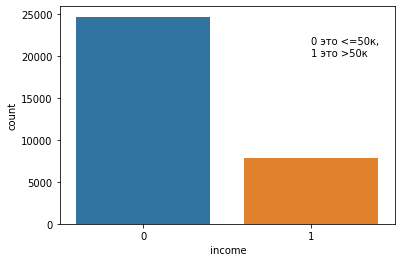

In [37]:
sns.countplot(x=' income', data=df)
plt.text(1,20000,"""0 это <=50к,
1 это >50к """)
plt.show()

In [26]:
X = df[['age',' education', ' workclass',' marital-status',' occupation', ' relationship', ' sex', ' native-country']].values
y = df[' income'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = LogisticRegression(max_iter=100)
model.fit(X_train,y_train)

answers_pred = model.predict(X_test)

print("For TestLogistic: ", accuracy_score(y_test,answers_pred))
print("For TrainLogistic: ", model.score(X_train, y_train))

For TestLogistic:  0.7512666973744818
For TrainLogistic:  0.7509213759213759


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
print(df.dtypes)

age                int64
 workclass         int64
 fnlwgt            int64
 education         int64
 education-num     int64
 marital-status    int64
 occupation        int64
 relationship      int64
 race              int64
 sex               int64
 capital-gain      int64
 capital-loss      int64
 hours-per-week    int64
 native-country    int64
 income            int64
dtype: object


In [29]:
pred = model.predict(X)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
feachures = pd.Series(['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
                      'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])

In [34]:
from sklearn.linear_model import LinearRegression
X = df.values
y = df[' income'].values

model = LinearRegression()
model.fit(X, y)


coeff = pd.DataFrame(model.coef_, columns=['coefficient'])
coeff['feachures'] = feachures

print(coeff)

     coefficient       feachures
0   1.402043e-17             age
1  -2.646809e-17       workclass
2   3.388132e-21          fnlwgt
3   7.584000e-17       education
4  -2.660226e-16   education-num
5  -1.431412e-16  marital-status
6  -3.266495e-17      occupation
7   1.006250e-16    relationship
8  -3.405998e-16            race
9  -8.581534e-17             sex
10 -1.540859e-18    capital-gain
11 -1.151453e-17    capital-loss
12  7.816111e-17  hours-per-week
13 -3.535215e-18  native-country
14  1.000000e+00          income


In [40]:

print(f"y = {model.intercept_} + {model.coef_} * x")

y = 2.3037127760972e-15 + [ 1.40204336e-17 -2.64680855e-17  3.38813179e-21  7.58399984e-17
 -2.66022579e-16 -1.43141150e-16 -3.26649515e-17  1.00625004e-16
 -3.40599817e-16 -8.58153411e-17 -1.54085881e-18 -1.15145328e-17
  7.81611061e-17 -3.53521488e-18  1.00000000e+00] * x
